In [19]:
import babypandas as bpd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [20]:
raw_chess_data_2022 = bpd.read_csv("jack_2022 (1).csv")
raw_chess_data_2022

,Date,Result,Rating,Color,Opponent,Opponent Rating,Opponent Result,Time Control,Time Class,FEN,ECO,ECO URL,Current Position
0,2022-01-01 13:41:04,win,1617,black,killquick876,1610,checkmated,60,bullet,6k1/ppp5/1n4pp/5p2/2Pb3P/1P6/P4q1N/5K2 w - -,B06,https://www.chess.com/openings/Modern-Defense-...,6k1/ppp5/1n4pp/5p2/2Pb3P/1P6/P4q1N/5K2 w - -
1,2022-01-01 13:44:57,win,1624,black,SHRINK777,1585,timeout,60,bullet,4Q3/8/Q5p1/7k/8/2N5/PPP5/2K5 w - -,B06,https://www.chess.com/openings/Modern-Defense-...,4Q3/8/Q5p1/7k/8/2N5/PPP5/2K5 w - -
2,2022-01-01 13:47:23,win,1630,white,mdsylvester,1534,timeout,60,bullet,8/pp1QB1kp/2n3p1/8/8/2KP1q2/PPP5/8 b - -,C47,https://www.chess.com/openings/Four-Knights-Game,8/pp1QB1kp/2n3p1/8/8/2KP1q2/PPP5/8 b - -
3,2022-01-01 13:49:17,win,1637,white,beauxnick,1564,checkmated,60,bullet,2r5/1Q1R4/p2kp3/3p1p1r/2pP4/2P5/PPB1KPP1/8 b - -,B13,https://www.chess.com/openings/Caro-Kann-Defen...,2r5/1Q1R4/p2kp3/3p1p1r/2pP4/2P5/PPB1KPP1/8 b - -
4,2022-01-01 13:51:28,win,1645,black,DMCISSP,1650,timeout,60,bullet,8/1k5p/6p1/6P1/3Q3P/4K3/P7/8 w - -,A40,https://www.chess.com/openings/Modern-Defense-...,8/1k5p/6p1/6P1/3Q3P/4K3/P7/8 w - -
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4476,2023-04-03 13:33:32,abandoned,1839,white,lucianoclever,1951,win,180,blitz,2r2rk1/pp1b1pb1/1qn1pn2/3p3p/5NpP/P1PB4/1P1N1P...,B13,https://www.chess.com/openings/Caro-Kann-Defen...,2r2rk1/pp1b1pb1/1qn1pn2/3p3p/5NpP/P1PB4/1P1N1P...
4477,2023-04-03 13:38:08,resigned,1833,white,PawnGobbler2004,1937,win,180,blitz,r4r1k/pp6/5pp1/4qb2/2B5/2P1R3/P1PK2PP/5R2 b - -,B70,https://www.chess.com/openings/Sicilian-Defens...,r4r1k/pp6/5pp1/4qb2/2B5/2P1R3/P1PK2PP/5R2 b - -
4478,2023-04-03 15:29:16,win,1841,white,Arizonacardinals,1823,checkmated,180,blitz,r1b5/p2p1R2/2p3pk/8/7Q/2q5/P1P3PP/7K b - -,B40,https://www.chess.com/openings/Sicilian-Defens...,r1b5/p2p1R2/2p3pk/8/7Q/2q5/P1P3PP/7K b - -
4479,2023-04-03 15:36:09,win,1847,black,akram22,1767,timeout,180,blitz,6k1/8/8/8/8/5pp1/r6p/4K3 w - -,A45,https://www.chess.com/openings/Indian-Game-2.B...,6k1/8/8/8/8/5pp1/r6p/4K3 w - -


In [55]:
raw_chess_data = raw_chess_data_2022.get(["Result", "Rating", "Color"])
chess_data_black = raw_chess_data[(raw_chess_data.get("Color") == "black") & (raw_chess_data.get("Result") != "win")]
chess_data_black = chess_data_black.groupby("Result").count().reset_index().sort_values(by="Rating")
chess_data_black

,Result,Rating,Color
1,agreed,8,8
0,abandoned,11,11
4,repetition,13,13
3,insufficient,16,16
6,stalemate,22,22
8,timevsinsufficient,32,32
7,timeout,191,191
2,checkmated,317,317
5,resigned,499,499


In [54]:
chess_data_white = raw_chess_data[(raw_chess_data.get("Color") == "white") & (raw_chess_data.get("Result") != "win")]
chess_data_white = chess_data_white.groupby("Result").count().reset_index().sort_values(by="Rating")
chess_data_white

,Result,Rating,Color
1,agreed,2,2
6,stalemate,8,8
0,abandoned,9,9
3,insufficient,17,17
4,repetition,18,18
8,timevsinsufficient,36,36
2,checkmated,258,258
7,timeout,292,292
5,resigned,450,450


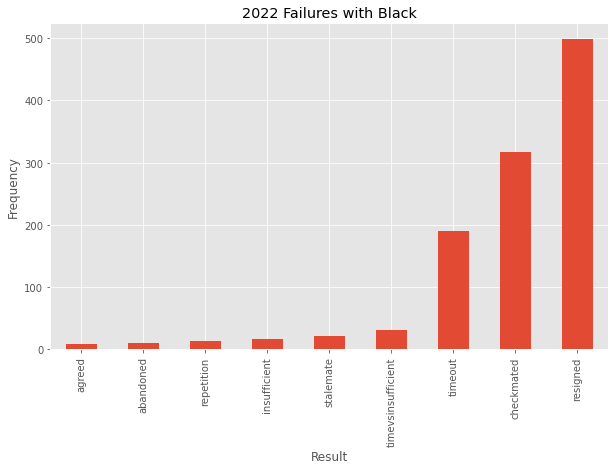

In [58]:
visualization_black = chess_data_black.plot(kind="bar", x="Result", y="Color", 
                                            xlabel="Result", ylabel="Frequency", 
                                            legend=False, figsize=[10,6],
                                           title="2022 Failures with Black");
visualization_black;

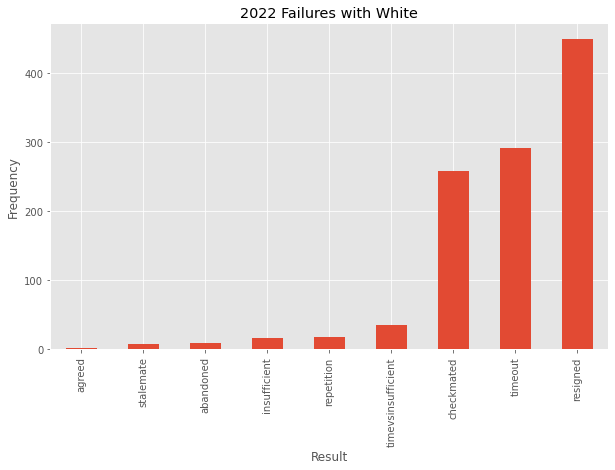

In [59]:
visualization_white = chess_data_white.plot(kind="bar", x="Result", y="Color", 
                                            xlabel="Result", ylabel="Frequency", 
                                            legend=False, figsize=[10,6],
                                           title="2022 Failures with White");
visualization_white;